In [1]:
import os
from tqdm import tqdm
from evaluation import ConGenVismoEval

eval = ConGenVismoEval()

/home/naasghar/convgenvismo/ConvGenVisMo/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [3]:
eval.iou_wrapper(f"dataset/images/1.jpeg", f"generated_images_dreamstudio/1_1.jpg")

[]


In [2]:
all_scores = {} # key is img_id, val is dict of all scores

for gt_item in tqdm(os.listdir('dataset/images')):
    # TODO: need to do something about heic images
    #if gt_item.split(".")[1].lower() not in ['jpg', 'jpeg', 'png']:
    #    continue
    img_id = gt_item.split(".")[0]
    all_scores[img_id] = {'clip_scores': [], 'psnr_scores': [], 'brisque_scores': [], 'uqi_scores': [], 'ssim_scores': [], 'iou_scores': [], 'ep_scores': []}
    for hop_id in range(20):
        if os.path.exists(f"generated_images_dreamstudio/{img_id}_{hop_id}.jpg"):
            clip_score = eval.clip_sim(f"dataset/images/{gt_item}", f"generated_images_dreamstudio/{img_id}_{hop_id}.jpg")
            psnr_score = eval.psnr(f"dataset/images/{gt_item}", f"generated_images_dreamstudio/{img_id}_{hop_id}.jpg")
            brisque_score = eval.brisque(f"generated_images_dreamstudio/{img_id}_{hop_id}.jpg")
            uqi_score = eval.uqi(f"dataset/images/{gt_item}", f"generated_images_dreamstudio/{img_id}_{hop_id}.jpg")
            ssim_score = eval.ssim(f"dataset/images/{gt_item}", f"generated_images_dreamstudio/{img_id}_{hop_id}.jpg")
            ep_score = eval.element_presence_scores(f"dataset/images/{gt_item}", f"generated_images_dreamstudio/{img_id}_{hop_id}.jpg")
            iou_score = eval.IoU(f"dataset/images/{gt_item}", f"generated_images_dreamstudio/{img_id}_{hop_id}.jpg")

            all_scores[img_id]['clip_scores'].append(clip_score)
            all_scores[img_id]['psnr_scores'].append(psnr_score)
            all_scores[img_id]['brisque_scores'].append(brisque_score)
            all_scores[img_id]['uqi_scores'].append(uqi_score)
            all_scores[img_id]['ssim_scores'].append(ssim_score)
            all_scores[img_id]['ep_scores'].append(ep_score)
            all_scores[img_id]['iou_scores'].append(iou_score)

100%|██████████████████████████████████████████████████████████████████████████████| 181/181 [5:31:28<00:00, 109.88s/it]


In [3]:
all_scores['1']

{'clip_scores': [0.72462946, 0.7578153, 0.84554386, 0.8306278],
 'psnr_scores': [4.366343010299197,
  7.4384064466939,
  4.686286460452656,
  5.6113537912105755],
 'brisque_scores': [22.328883755338296,
  56.79221669256262,
  49.07963697000818,
  40.43944552548189],
 'uqi_scores': [0.4727528016948596,
  0.6875292875604909,
  0.5000102694729565,
  0.5632282362932518],
 'ssim_scores': [{'ssim': 0.21083683985345128, 'cs': 0.3933433170242864},
  {'ssim': 0.461417076538195, 'cs': 0.5417570082161186},
  {'ssim': 0.3218868646451117, 'cs': 0.5398108320529346},
  {'ssim': 0.30780912392516463, 'cs': 0.4408278995841581}],
 'iou_scores': [],
 'ep_scores': [{'precision': 0.0,
   'recall': 1,
   'f1': 0.0,
   'elements': {'img_yt': Counter(), 'img_yhat': Counter({'tie': 1})}},
  {'precision': 1,
   'recall': 1,
   'f1': 1.0,
   'elements': {'img_yt': Counter(), 'img_yhat': Counter()}},
  {'precision': 1,
   'recall': 1,
   'f1': 1.0,
   'elements': {'img_yt': Counter(), 'img_yhat': Counter()}},
  {'

In [7]:
# import pickle
# with open('all_scores_new.pickle', 'wb') as handle:
#     pickle.dump(all_scores, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [35]:
import numpy as np
import itertools

clip_arrays = []
psnr_arrays = []
brisque_arrays = []
uqi_arrays = []
ssim_arrays = []
ssim_cs_arrays = []
ep_pr_arrays = []
ep_re_arrays = []
ep_f1_arrays = []
#TODO
iou_arrays = []

for idx in all_scores.keys():
    clip_arrays.append(np.array(all_scores[idx]['clip_scores']))
    psnr_arrays.append(np.array(all_scores[idx]['psnr_scores']))
    brisque_arrays.append(np.array(all_scores[idx]['brisque_scores']))
    uqi_arrays.append(np.array(all_scores[idx]['uqi_scores']))
    
    temp_ssim_list = []
    temp_ssim_cs_list = []
    for item in all_scores[idx]['ssim_scores']:
        temp_ssim_list.append(item['ssim'])
        temp_ssim_cs_list.append(item['cs'])
    ssim_arrays.append(np.array(temp_ssim_list))
    ssim_cs_arrays.append(np.array(temp_ssim_cs_list))
    
    temp_ep_pr_list = []
    temp_ep_re_list = []
    temp_ep_f1_list = []
    for item in all_scores[idx]['ep_scores']:
        temp_ep_pr_list.append(item['precision'])
        temp_ep_re_list.append(item['recall'])
        temp_ep_f1_list.append(item['f1'])
    ep_pr_arrays.append(np.array(temp_ep_pr_list))
    ep_re_arrays.append(np.array(temp_ep_re_list))
    ep_f1_arrays.append(np.array(temp_ep_f1_list))

In [38]:
zipped_clip_arrays = list(itertools.zip_longest(*clip_arrays, fillvalue=np.nan))
zipped_psnr_arrays = list(itertools.zip_longest(*psnr_arrays, fillvalue=np.nan))
zipped_brisque_arrays = list(itertools.zip_longest(*brisque_arrays, fillvalue=np.nan))
zipped_uqi_arrays = list(itertools.zip_longest(*uqi_arrays, fillvalue=np.nan))
zipped_ssim_arrays = list(itertools.zip_longest(*ssim_arrays, fillvalue=np.nan))
zipped_ssim_cs_arrays = list(itertools.zip_longest(*ssim_cs_arrays, fillvalue=np.nan))
zipped_ep_pr_arrays = list(itertools.zip_longest(*ep_pr_arrays, fillvalue=np.nan))
zipped_ep_re_arrays = list(itertools.zip_longest(*ep_re_arrays, fillvalue=np.nan))
zipped_ep_f1_arrays = list(itertools.zip_longest(*ep_f1_arrays, fillvalue=np.nan))

clip_means = [np.nanmean(k) for k in zipped_clip_arrays]
psnr_means = [np.nanmean(k) for k in zipped_psnr_arrays]
brisque_means = [np.nanmean(k) for k in zipped_brisque_arrays]
uqi_means = [np.nanmean(k) for k in zipped_uqi_arrays]
ssim_means = [np.nanmean(k) for k in zipped_ssim_arrays]
ssim_cs_means = [np.nanmean(k) for k in zipped_ssim_cs_arrays]
ep_pr_means = [np.nanmean(k) for k in zipped_ep_pr_arrays]
ep_re_means = [np.nanmean(k) for k in zipped_ep_re_arrays]
ep_f1_means = [np.nanmean(k) for k in zipped_ep_f1_arrays]

In [39]:
clip_means

[0.6525051323806539,
 0.6926656111457644,
 0.6898759615714433,
 0.7053064056805202,
 0.6899990737438202]

In [40]:
psnr_means

[7.7369451546326395,
 7.755316516769266,
 7.836880434071172,
 7.5672060971566095,
 8.137024707192404]

In [41]:
brisque_means

[22.0955106867713,
 23.90000848688206,
 24.436409306775644,
 23.805564025355793,
 22.505335926714537]

In [42]:
uqi_means

[0.5182985800823238,
 0.5172375004745569,
 0.5193707431766358,
 0.490732317900807,
 0.5044970034112408]

In [43]:
ssim_means

[0.21511968892954944,
 0.21650630580941543,
 0.2196944585225244,
 0.23109663711251105,
 0.2279747389445503]

In [44]:
ssim_cs_means

[0.33775450610792596,
 0.33932340145640427,
 0.34221714086945426,
 0.37734725507437705,
 0.372826975816248]

In [45]:
ep_pr_means

[0.48672999901715075,
 0.4699865461193709,
 0.48994334445154114,
 0.39975262832405684,
 0.275]

In [46]:
ep_re_means

[0.5092939848822203,
 0.5287791213826716,
 0.5471369553336766,
 0.5687878787878787,
 0.78125]

In [47]:
ep_f1_means

[0.30528898483352496,
 0.2894530070535867,
 0.31780159991536433,
 0.3363760049474335,
 0.37916666666666665]

In [ ]:
#!pip install matplotlib

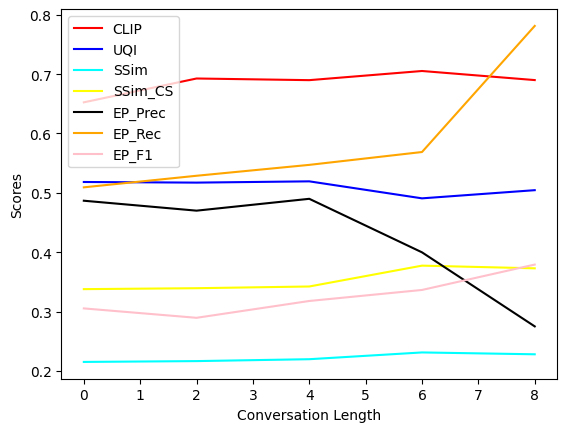

In [62]:
import matplotlib.pyplot as plt

xs = [0, 2, 4, 6, 8]

plt.plot(xs, clip_means, color='red', label='CLIP')
#plt.plot(xs, psnr_means, color='magenta', label='PSNR')
#plt.plot(xs, brisque_means, color='green', label='Brisque')
plt.plot(xs, uqi_means, color='blue', label='UQI')
plt.plot(xs, ssim_means, color='cyan', label='SSim')
plt.plot(xs, ssim_cs_means, color='yellow', label='SSim_CS')
plt.plot(xs, ep_pr_means, color='black', label='EP_Prec')
plt.plot(xs, ep_re_means, color='orange', label='EP_Rec')
plt.plot(xs, ep_f1_means, color='pink', label='EP_F1')
plt.legend(loc="upper left")
plt.xlabel('Conversation Length', fontsize=10)
plt.ylabel('Scores', fontsize=10)
plt.show()

#plt.close()

In [59]:
print(psnr_means)

[7.7369451546326395, 7.755316516769266, 7.836880434071172, 7.5672060971566095, 8.137024707192404]


In [60]:
print(brisque_means)

[22.0955106867713, 23.90000848688206, 24.436409306775644, 23.805564025355793, 22.505335926714537]
